In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx

from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

import matplotlib.pyplot as plt

In [3]:
p = 25
n_true = 50000
n_experiments = 500
λ = 3
δ = 0.2
ns = np.arange(25,525,25)

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [4]:
# Continuous market distribution
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p)]
M_true = synth.GaussianMarket(X_true,R_true)

In [5]:
# Discretized market model 
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [6]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [7]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [8]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))

In [9]:
# About 5minutes running time.
for i,n in enumerate(ns):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf)
    prs.sample(n_experiments)
    qs[i,:,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos

Sampling 500 problems of size 500 × 26
Sampling 500 problems of size 475 × 26
Sampling 500 problems of size 450 × 26
Sampling 500 problems of size 425 × 26
Sampling 500 problems of size 400 × 26
Sampling 500 problems of size 375 × 26
Sampling 500 problems of size 350 × 26
Sampling 500 problems of size 325 × 26
Sampling 500 problems of size 300 × 26
Sampling 500 problems of size 275 × 26
Sampling 500 problems of size 250 × 26
Sampling 500 problems of size 225 × 26
Sampling 500 problems of size 200 × 26
Sampling 500 problems of size 175 × 26
Sampling 500 problems of size 150 × 26
Sampling 500 problems of size 125 × 26
Sampling 500 problems of size 100 × 26
Sampling 500 problems of size 75 × 26
Sampling 500 problems of size 50 × 26
Sampling 500 problems of size 25 × 26


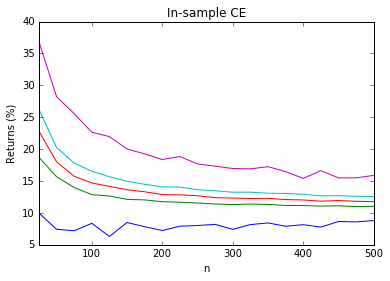

In [16]:
plt.plot(*five_stats(CEs_ins,ns));
plt.xlabel('n')
plt.ylabel('Returns (%)')
plt.title('In-sample CE')
plt.axis(xmin=25);

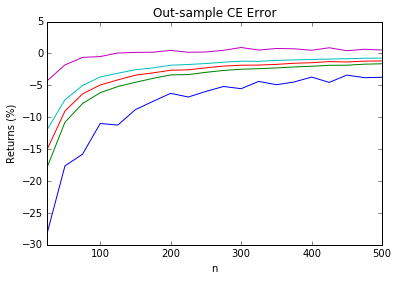

In [17]:
plt.plot(*five_stats(CEs_oos-CEs_ins,ns))
plt.xlabel('n')
plt.ylabel('Returns (%)')
plt.title('Out-sample CE Error')
plt.axis(xmin=25);

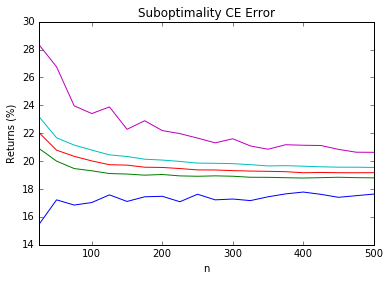

In [18]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ns));
plt.xlabel('n')
plt.ylabel('Returns (%)')
plt.axis(xmin=25)
plt.title('Suboptimality CE Error');